Saving Mall_Customers.csv to Mall_Customers (1).csv
Dataset Preview:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Checking for missing values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


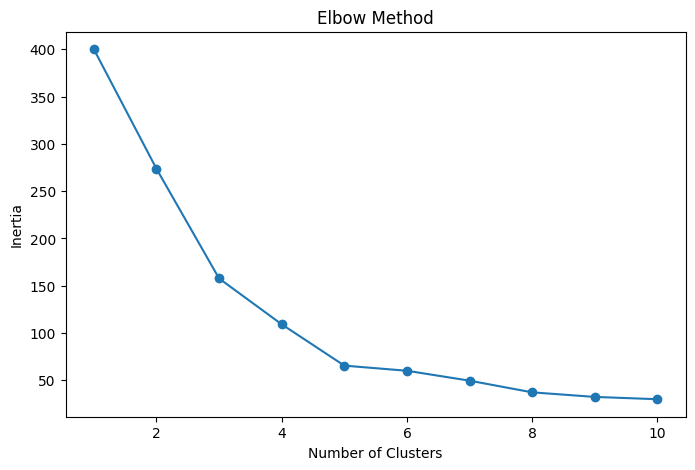

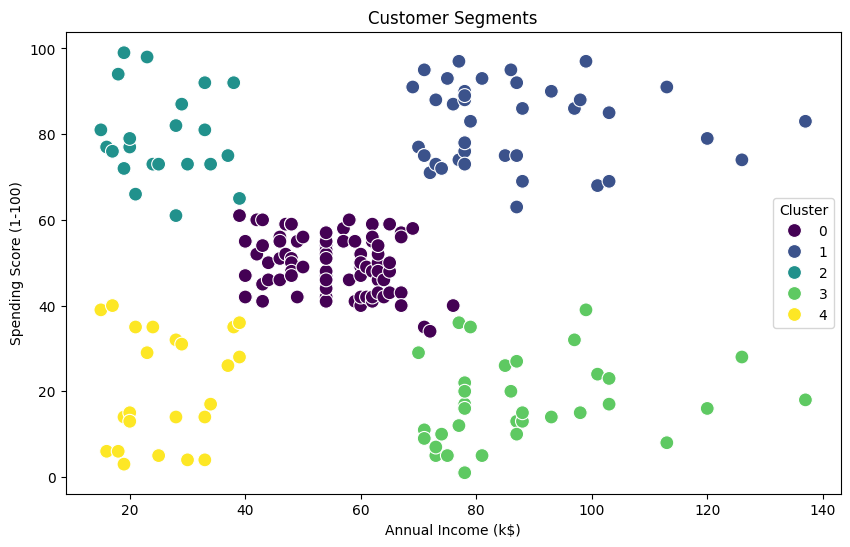

Clustered dataset saved as 'clustered_customers.csv'


In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1: Load the dataset
# Assuming you have uploaded the Kaggle dataset CSV file to Colab
from google.colab import files
uploaded = files.upload()  # Upload the dataset file here (customer-segmentation.csv)

# Step 2: Read the dataset
file_name = list(uploaded.keys())[0]
data = pd.read_csv(file_name)

# Displaying the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

# Step 3: Data Preprocessing
# Dropping unnecessary columns if required (adjust based on the dataset)
print("\nChecking for missing values:")
print(data.isnull().sum())

# Select relevant numerical columns (adjust according to dataset columns)
# For example: 'Annual Income (k$)', 'Spending Score (1-100)'
columns_to_use = ['Annual Income (k$)', 'Spending Score (1-100)']  # Change these column names as per dataset
data = data[columns_to_use]

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Step 4: Elbow Method to find optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Step 5: Applying K-means Clustering
# Based on the elbow method, set the optimal number of clusters
optimal_clusters = 5  # Replace with the elbow method result
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

# Step 6: Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=data[columns_to_use[0]],
    y=data[columns_to_use[1]],
    hue=data['Cluster'],
    palette='viridis',
    s=100
)
plt.title('Customer Segments')
plt.xlabel(columns_to_use[0])
plt.ylabel(columns_to_use[1])
plt.legend(title='Cluster')
plt.show()

# Step 7: Save the clustered dataset
data.to_csv('clustered_customers.csv', index=False)
print("Clustered dataset saved as 'clustered_customers.csv'")